This example shows the use of the airfoil classes lib to create and plot profiles by calculating and displaying the values for upper and lower surfaces, camber, camber gradient and thickness for the following cases:

- a flat plate
- NACA 0010
- NACA 2412
- NACA 4424

Any other airfoil of the series can be calculated by adding its specifications to the lists M, P, T below.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from vlm.airfoils import flat_plate, NACA4

from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

### Plotting a flat plate

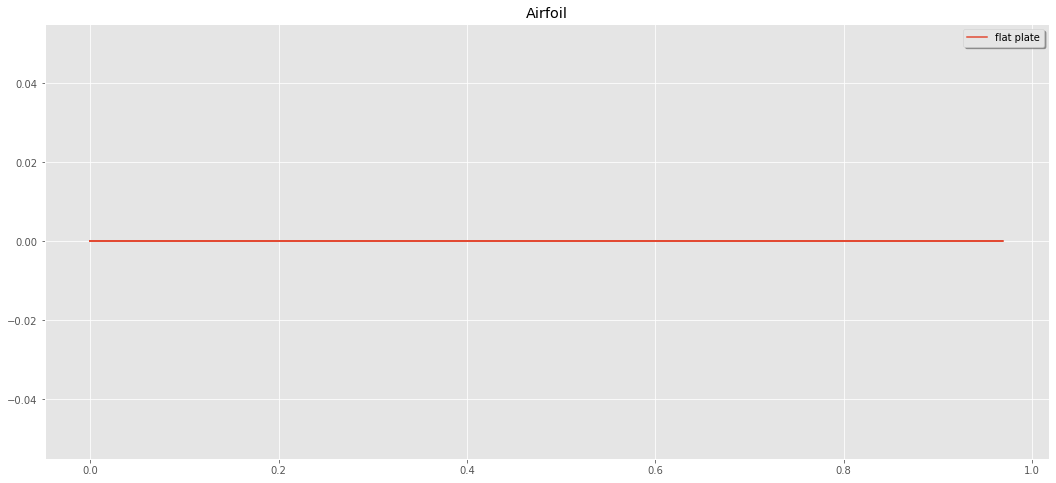

In [4]:
#plt.figure(figsize=(18, 6))
airfoil = flat_plate()

n = 10
X, Y = np.zeros(n), np.zeros(n)

for beta, i in zip(np.linspace(0, 2*np.pi, n), range(0, n)):
    x = 0.5 * (1 - np.cos(beta))  # cosine spacing

    if beta > 0 and beta < np.pi:
        X[i], Y[i] = airfoil.upper_surface(x)
    else:
        X[i], Y[i] = airfoil.lower_surface(x)

plt.style.use('ggplot')
plt.title('Airfoil')
plt.plot(X, Y, '-', label='flat plate')
plt.legend(shadow=True)
plt.show()

### Plotting NACA4 airfoil profiles

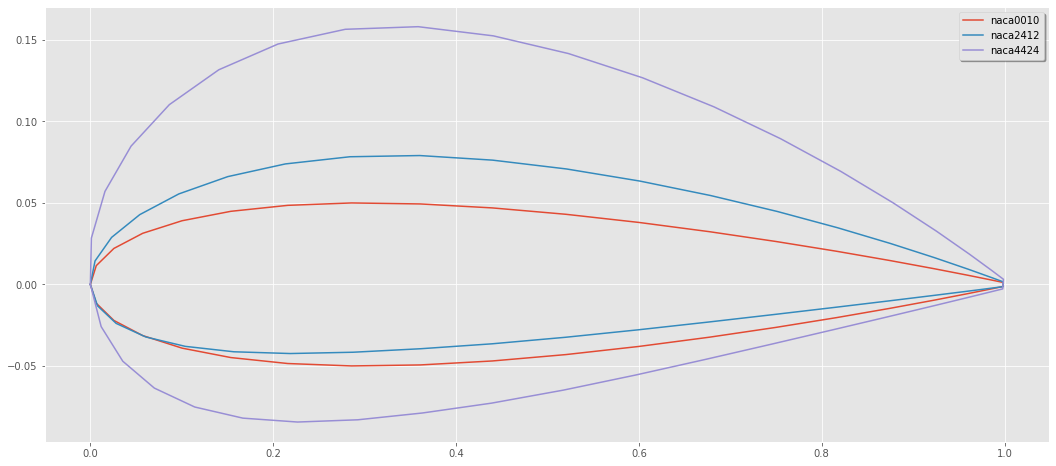

In [5]:
# Data stored in lists with the defining 4 digits
M = [0, 2, 4]
P = [0, 4, 4]
T = [10, 12, 24]

for m, p, t in zip(M, P, T):
    airfoil = NACA4(m, p, t)

    n = 40
    X, Y = np.zeros(n), np.zeros(n)

    for beta, i in zip(np.linspace(0, 2*np.pi, n), range(0, n)):
        x = 0.5 * (1 - np.cos(beta))  # cosine spacing

        if beta > 0 and beta < np.pi:
            X[i], Y[i] = airfoil.upper_surface(x)
        else:
            X[i], Y[i] = airfoil.lower_surface(x)

    name = 'naca' + str(m) + str(p) + str(t)
    plt.plot(X, Y, '-', label=name)
    plt.legend(shadow=True)

### Plotting of camber, camber gradient and thickness

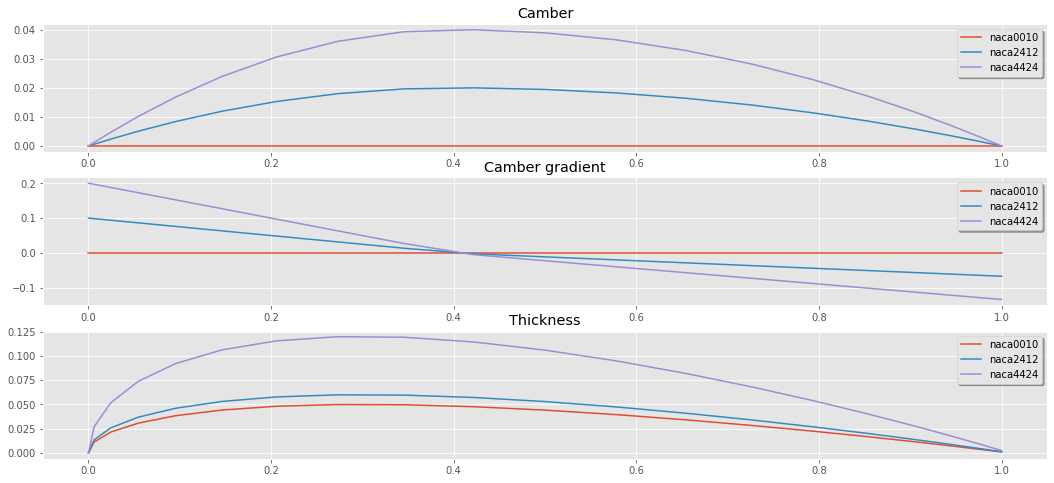

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)

for m, p, t in zip(M, P, T):
    airfoil = NACA4(m, p, t)

    n = 21
    X, Z, dZ, thickness = np.zeros(n), np.zeros(n), np.zeros(n), np.zeros(n)

    for beta, i in zip(np.linspace(0, np.pi, n), range(0, n)):
        x = 0.5 * (1 - np.cos(beta))  # cosine spacing

        X[i], thickness[i] = x, airfoil.thickness(x)
        Z[i], dZ[i] = airfoil.camber_line(x), airfoil.camber_gradient(x)

    name = 'naca' + str(m) + str(p) + str(t)
    
    ax1.title.set_text('Camber')
    ax1.plot(X, Z, '-', label=name)
    ax1.legend(shadow=True)

    ax2.title.set_text('Camber gradient')
    ax2.plot(X, dZ, '-', label=name)
    ax2.legend(shadow=True)

    ax3.title.set_text('Thickness')
    ax3.plot(X, thickness, '-', label=name)
    ax3.legend(shadow=True)

plt.show()